Files already downloaded and verified


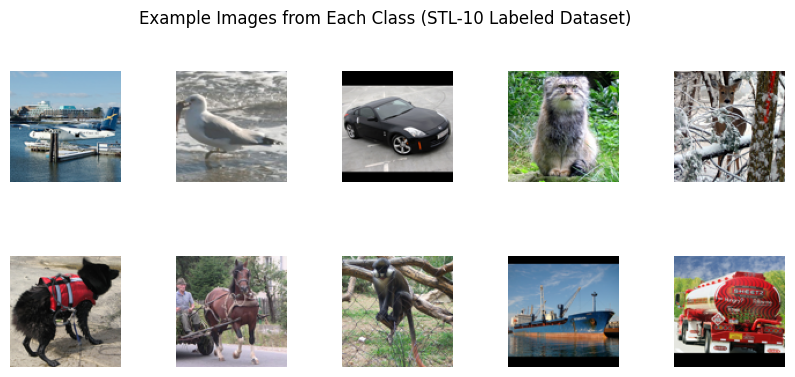

In [12]:
import torch
from torchvision.datasets import STL10
import numpy as np
import matplotlib.pyplot as plt

# Load the STL-10 dataset
stl10_trainset = STL10(root='./stl10_data', split='train', download=True)

# Get the unique class labels
unique_labels = np.unique(stl10_trainset.labels)

# Create a 2x5 grid of example images (10 in total)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, label in enumerate(unique_labels[:10]):
    class_indices = [j for j, target in enumerate(stl10_trainset.labels) if target == label]
    example_index = np.random.choice(class_indices, 1)[0]  # Select one random example for each class

    image = stl10_trainset.data[example_index]  # No need to convert to NumPy array
    image = np.transpose(image, (1, 2, 0))  # Transpose color channels
    axs[i // 5, i % 5].imshow(image)
    axs[i // 5, i % 5].axis('off')

plt.suptitle('Example Images from Each Class (STL-10 Labeled Dataset)', y=1.02)
plt.show()


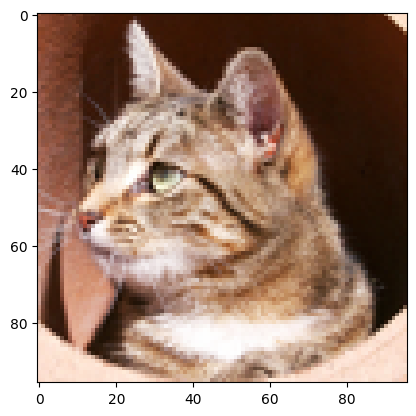

In [22]:
image = stl10_trainset.data[89]
image = np.transpose(image, (1, 2, 0))
plt.imshow(image)

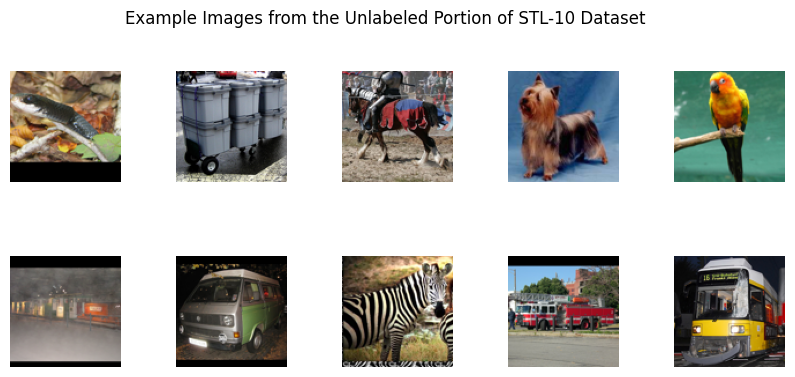

In [9]:
# import torch
from torchvision.datasets import STL10
import numpy as np
import matplotlib.pyplot as plt

# Load the STL-10 dataset
stl10_unlabeled = STL10(root='./stl10_data', split='unlabeled', download=False)

# Create a 2x5 grid of example images (10 in total)
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(10):
    example_index = np.random.randint(0, len(stl10_unlabeled))  # Select one random example from the unlabeled dataset

    image = stl10_unlabeled.data[example_index]  # No need to convert to NumPy array
    image = np.transpose(image, (1, 2, 0))  # Transpose color channels
    axs[i // 5, i % 5].imshow(image)
    axs[i // 5, i % 5].axis('off')

plt.suptitle('Example Images from the Unlabeled Portion of STL-10 Dataset', y=1.02)
plt.show()



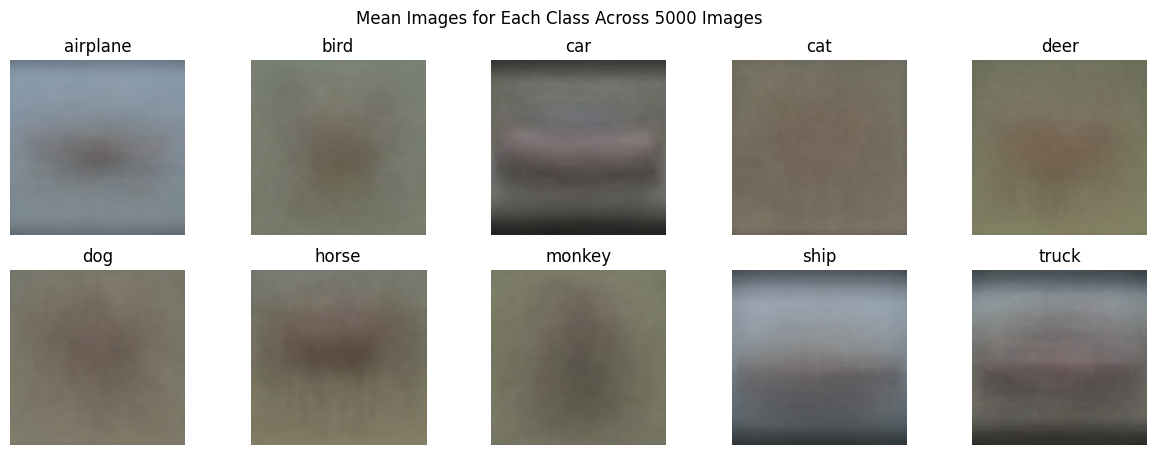

In [9]:
##### import torch
from torchvision.datasets import STL10
import numpy as np
import matplotlib.pyplot as plt

# Load the STL-10 dataset
stl10_trainset = STL10(root='./stl10_data', split='train', download=False)

# Extract the data as a NumPy array
X = stl10_trainset.data  # X is already a NumPy array
y = np.array(stl10_trainset.labels)  # Class labels

# Define the class names for STL-10 dataset
class_names = ["airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]

# Get the unique class labels
unique_labels = np.unique(y)

# Define the number of images to use for calculating the mean
num_images_per_class = 5000  # Adjust this number as needed

# Calculate the mean image for each class using a subset of images
mean_images = []
for label in unique_labels:
    class_images = X[y == label][:num_images_per_class]
    mean_image = np.mean(class_images, axis=0)
    mean_images.append(mean_image)

# Plot the mean images with labels and the number of images used
num_classes = len(unique_labels)
plt.figure(figsize=(15, 5))
for i, mean_image in enumerate(mean_images):
    plt.subplot(2, num_classes // 2, i + 1)
    # Transpose the image to (96, 96, 3) for correct display
    mean_image = np.transpose(mean_image, (1, 2, 0))
    plt.imshow(mean_image.astype(np.uint8))
    plt.title(f"{class_names[unique_labels[i]]}")
    plt.axis('off')
titlestring = 'Mean Images for Each Class Across {} Images'.format(num_images_per_class)
plt.suptitle(titlestring)
plt.show()


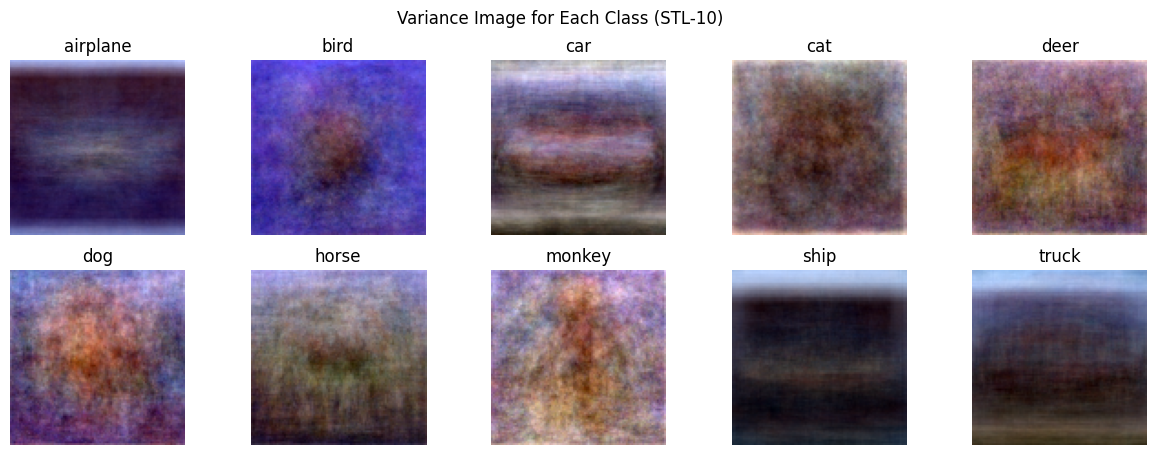

In [103]:
import torch
from torchvision.datasets import STL10
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

# Load the STL-10 dataset
stl10_trainset = STL10(root='./stl10_data', split='train', download=False)

# Define the class names for STL-10 dataset
class_names = ["airplane", "bird", "car", "cat", "deer", "dog", "horse", "monkey", "ship", "truck"]

# Get the unique class labels
unique_labels = np.unique(stl10_trainset.labels)

# Calculate the variance image for each class
variance_images = []
transform = transforms.ToTensor()
for label in unique_labels:
    class_indices = [i for i, target in enumerate(stl10_trainset.labels) if target == label]
    class_images = [transform(stl10_trainset[i][0]) for i in class_indices]
    class_images = torch.stack(class_images)
    variance_image = torch.var(class_images, dim=0)  # Calculate the variance along the batch dimension
    variance_images.append(variance_image)

# Normalize the variance images to the range [0, 1]
variance_images = [(image - image.min()) / (image.max() - image.min()) for image in variance_images]

# Plot the variance images with labels
num_classes = len(unique_labels)
plt.figure(figsize=(15, 5))
for i, variance_image in enumerate(variance_images):
    plt.subplot(2, num_classes // 2, i + 1)
    plt.imshow(variance_image.permute(1, 2, 0))
    plt.title(class_names[unique_labels[i]])
    plt.axis('off')

plt.suptitle('Variance Image for Each Class (STL-10)')
plt.show()


In [ ]:
import torch

# Define a function to compute mean and standard deviation
def compute_mean_std(loader):
    # Initialize variables to accumulate sum and sum of squares for each channel
    mean_sum = torch.zeros(3)
    std_sum = torch.zeros(3)
    num_samples = 0

    # Iterate through the dataset to compute the sums
    for data, _ in loader:
        # Shape of data: (batch_size, channels, height, width)
        batch_mean = data.mean(dim=(0, 2, 3))  # Compute mean for each channel
        batch_std = data.std(dim=(0, 2, 3))    # Compute standard deviation for each channel

        # Accumulate the sums
        mean_sum += batch_mean.sum()
        std_sum += batch_std.sum()
        num_samples += data.size(0)

    # Calculate the final mean and standard deviation for each channel
    final_mean = mean_sum / num_samples
    final_std = std_sum / num_samples

    return final_mean, final_std

# Compute mean and standard deviation
mean, std = compute_mean_std(train_loader)

# Print mean and standard deviation for each channel
print("Mean - Red Channel:", mean[0])
print("Mean - Green Channel:", mean[1])
print("Mean - Blue Channel:", mean[2])
print("\n")
print("Standard Deviation - Red Channel:", std[0])
print("Standard Deviation - Green Channel:", std[1])
print("Standard Deviation - Blue Channel:", std[2])


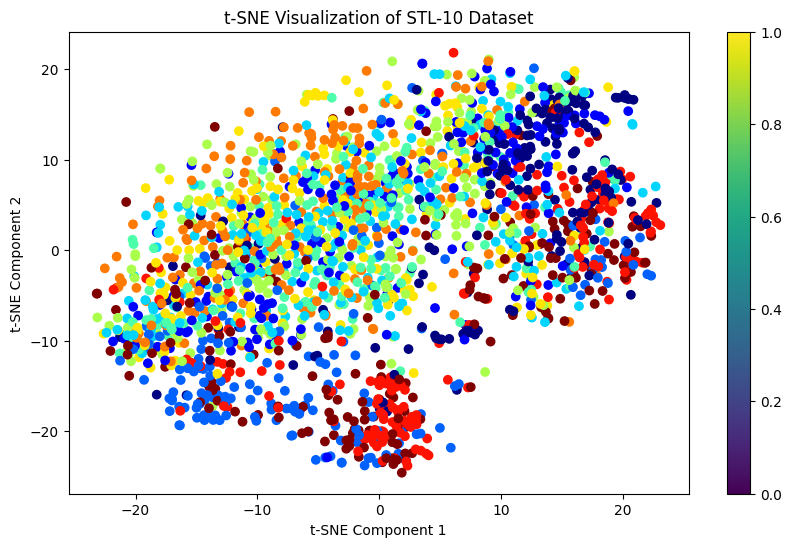

In [104]:
import torch
import torchvision
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load STL-10 dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to range [-1, 1]
])

# Set download to True if data is not already downloaded
stl10_train_dataset = torchvision.datasets.STL10(root='./data', split='train', download=False, transform=transform)

# Select a subset of the dataset (for faster computation)
subset_size = 2000
subset_data = stl10_train_dataset.data[:subset_size].reshape(subset_size, -1) / 255.0  # Reshape and normalize

# Convert to PyTorch tensor
subset_tensor = torch.tensor(subset_data, dtype=torch.float32)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(subset_tensor)

# Plot the t-SNE embeddings
plt.figure(figsize=(10, 6))
original_labels = stl10_train_dataset.labels[:subset_size]
normalized_labels = original_labels / 9.0
colors = plt.cm.jet(normalized_labels)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=colors)
plt.colorbar()
plt.title('t-SNE Visualization of STL-10 Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/tmp/ipykernel_3648846/1032014110.py:39: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



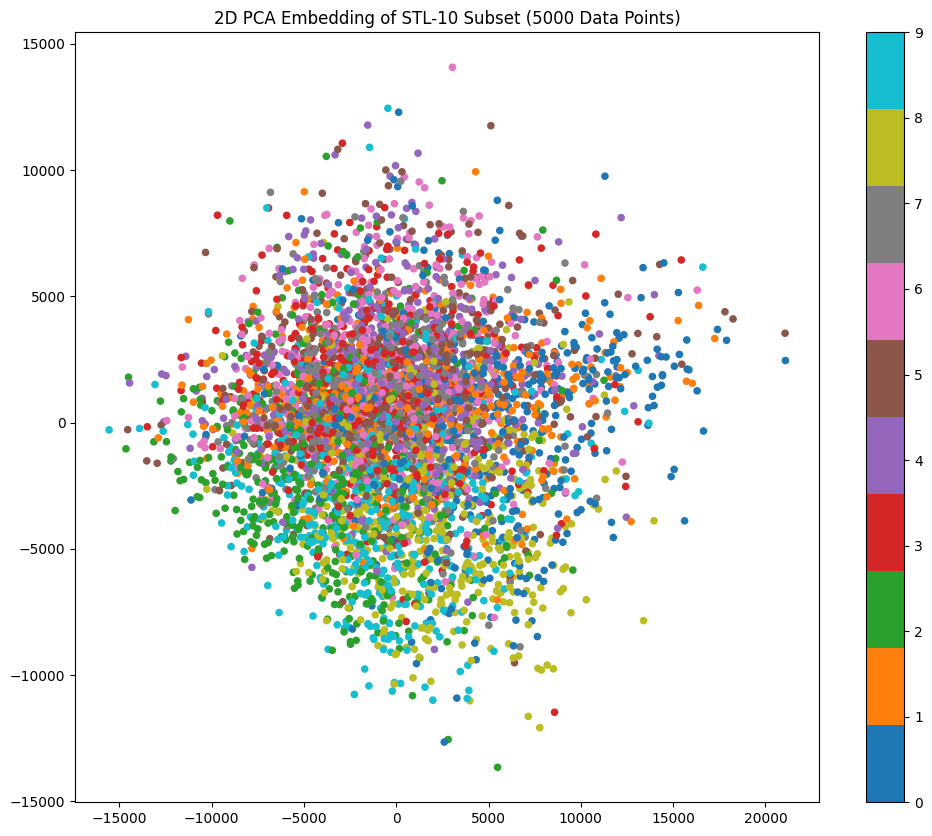

In [105]:
import torch
import torchvision
from torchvision import transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Load the STL-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
stl10_trainset = torchvision.datasets.STL10(root='./stl10_data', split='train', download=False, transform=transform)

# Define the number of data points you want to use
subset_size = 5000  # Change this to your desired number of data points

# Select a range of samples from the dataset
subset_indices = range(subset_size)
stl10_subset = torch.utils.data.Subset(stl10_trainset, subset_indices)

# Create a dataloader for the subset
batch_size = 64
trainloader = torch.utils.data.DataLoader(stl10_subset, batch_size=batch_size, shuffle=True)

# Flatten the images
X = stl10_subset.dataset.data.reshape(len(stl10_subset), -1)

# Perform PCA for 2D embedding
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Set a scaling factor for the scatter plot
scaling_factor = 20

# Increase the figure size
plt.figure(figsize=(12, 10))

# Plot the PCA result with increased spacing
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=stl10_subset.dataset.labels[subset_indices], cmap=plt.cm.get_cmap('tab10', 10), s=scaling_factor)
plt.colorbar()
plt.title(f'2D PCA Embedding of STL-10 Subset ({subset_size} Data Points)')
plt.show()


In [106]:
!pip install plotly

Files already downloaded and verified


<Figure size 640x480 with 0 Axes>

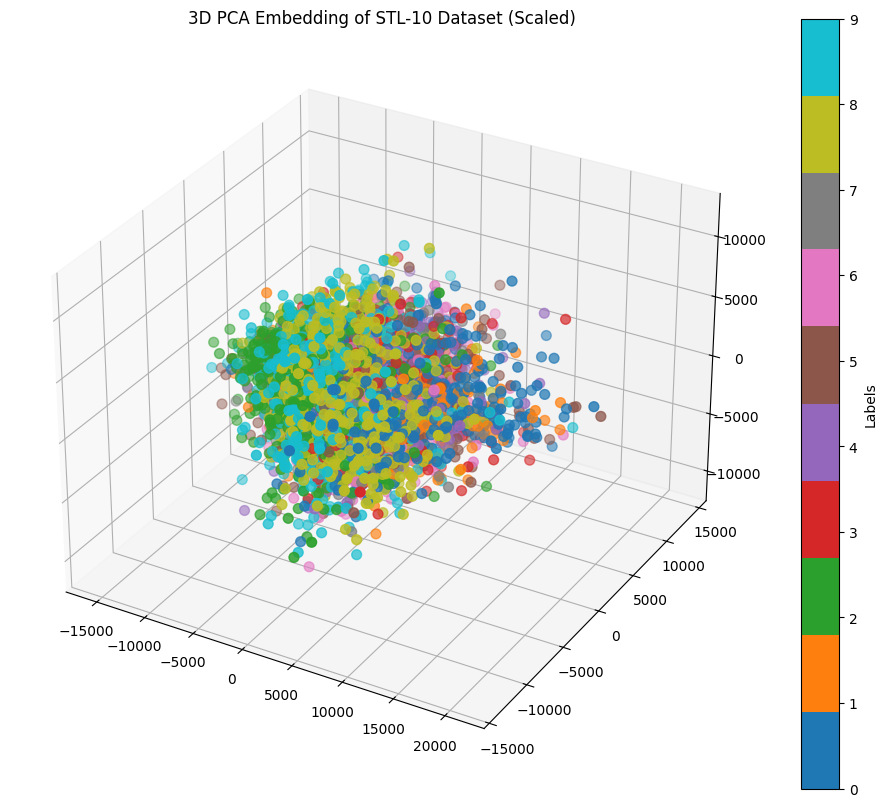

In [107]:
import torch
import torchvision
from torchvision import transforms
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
torch.manual_seed(42)

# Load the STL-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
stl10_trainset = torchvision.datasets.STL10(root='./stl10_data', split='train', download=True, transform=transform)

# Flatten the images
X = stl10_trainset.data.reshape(len(stl10_trainset), -1)

# Perform PCA for 3D embedding
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Set a scaling factor to space out data points
scaling_factor = 50  # Adjust this value as needed

# Create a 3D scatter plot with Matplotlib and apply the scaling factor
fig = plt.figure()
fig = plt.figure(figsize=(12, 10)) 
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=stl10_trainset.labels, cmap=plt.get_cmap('tab10'), s=scaling_factor)
plt.colorbar(scatter, label='Labels')
ax.set_title('3D PCA Embedding of STL-10 Dataset (Scaled)')



plt.show()


Files already downloaded and verified
Average Red Channel Mean: 0.44236260652542114
Average Green Channel Mean: 0.4248538315296173
Average Blue Channel Mean: 0.3862941861152649


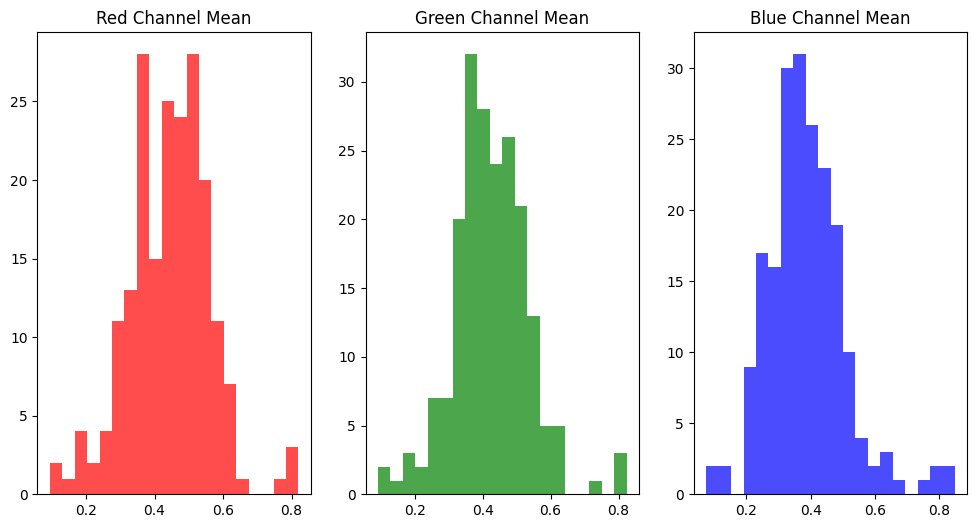

In [14]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import STL10
import matplotlib.pyplot as plt
import random
import numpy as np

# Set a seed for reproducibility
random.seed(42)

# Load the STL-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
unlabeled_data = STL10(root="./data", split="unlabeled", transform=transform, download=True)

# Randomly select a subset of images for color analysis
num_images_to_analyze = 200  # You can adjust this as needed

# Initialize lists to store color distribution statistics
red_channel_means = []
green_channel_means = []
blue_channel_means = []

for _ in range(num_images_to_analyze):
    random_index = random.randint(0, len(unlabeled_data) - 1)
    image, _ = unlabeled_data[random_index]

    # Convert from tensor to NumPy array
    image = image.permute(1, 2, 0).numpy()

    # Calculate the mean color values for each channel (Red, Green, Blue)
    red_mean = np.mean(image[:, :, 0])
    green_mean = np.mean(image[:, :, 1])
    blue_mean = np.mean(image[:, :, 2])

    red_channel_means.append(red_mean)
    green_channel_means.append(green_mean)
    blue_channel_means.append(blue_mean)

# Calculate the overall color distribution statistics
avg_red_channel_mean = np.mean(red_channel_means)
avg_green_channel_mean = np.mean(green_channel_means)
avg_blue_channel_mean = np.mean(blue_channel_means)

# Display the color distribution statistics
print(f"Average Red Channel Mean: {avg_red_channel_mean}")
print(f"Average Green Channel Mean: {avg_green_channel_mean}")
print(f"Average Blue Channel Mean: {avg_blue_channel_mean}")

# Plot histograms of the color channel means
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.hist(red_channel_means, bins=20, color='red', alpha=0.7)
plt.title("Red Channel Mean")

plt.subplot(132)
plt.hist(green_channel_means, bins=20, color='green', alpha=0.7)
plt.title("Green Channel Mean")

plt.subplot(133)
plt.hist(blue_channel_means, bins=20, color='blue', alpha=0.7)
plt.title("Blue Channel Mean")

plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import io
import torch
from torchvision import transforms
from torchvision.datasets import STL10
from torch.utils.data import DataLoader
from torch.utils.data.sampler import RandomSampler  # Correct import

# Set the number of samples and seed for reproducibility
num_samples = 10
seed = 42

# Set up the STL10 dataset
stl10_dataset = STL10(root="./", split="unlabeled", download=False, transform=transforms.ToTensor())

# Use RandomSampler with the specified seed for shuffling
random_sampler = RandomSampler(stl10_dataset, replacement=True, num_samples=num_samples, generator=torch.Generator().manual_seed(seed))
dataloader = DataLoader(stl10_dataset, batch_size=num_samples, sampler=random_sampler)

# Function to compute Haralick features for a given image
def compute_haralick_features(image):
    # Convert the image to grayscale
    gray_image = np.array(image)[:, :, 0]

    # Compute the GLCM (Grey-Level Co-occurrence Matrix)
    glcm = graycomatrix(gray_image, [1], [0], symmetric=True, normed=True)

    # Compute Haralick features
    haralick_features = graycoprops(glcm, prop='contrast'), \
                       graycoprops(glcm, prop='correlation'), \
                       graycoprops(glcm, prop='energy'), \
                       graycoprops(glcm, prop='homogeneity')

    return haralick_features

# Function to visualize the computed Haralick features
def visualize_haralick_features(image, features):
    plt.figure(figsize=(12, 3))
    plt.subplot(131)
    plt.imshow(image.permute(1, 2, 0))
    plt.title("Image")

    plt.subplot(132)
    plt.imshow(features[0], cmap='gray')
    plt.title("Contrast")

    plt.subplot(133)
    plt.imshow(features[1], cmap='gray')
    plt.title("Correlation")

    plt.show()

# Process a random subset of the dataset
for batch in dataloader:
    for i in range(num_samples):
        image = batch[i]
        haralick_features = compute_haralick_features(image)
        visualize_haralick_features(image, haralick_features)


ValueError: The parameter `image` must be a 2-dimensional array

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
from torchvision.datasets import STL10
from torchvision import transforms
from torch.utils.data import DataLoader

# Set the number of samples, seed for reproducibility, and the number of filters to apply
num_samples = 10
seed = 42
num_filters = 5  # You can change this to experiment with different filters

# Set up the STL10 dataset
stl10_dataset = STL10(root="./", split="unlabeled", download=False, transform=transforms.ToTensor())

# Create a DataLoader for random subset
random_subset = random.sample(range(len(stl10_dataset)), num_samples)
subset_loader = DataLoader(stl10_dataset, batch_size=num_samples, sampler=random_subset)

# Function to apply and visualize filters
def apply_and_visualize_filters(image):
    # Compute the average of the image subset
    average_image = torch.mean(image, dim=0)

    # Initialize a subplot for visualizing the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, num_filters + 1, 1)
    plt.imshow(average_image.permute(1, 2, 0), cmap='gray')
    plt.title("Average Image")

    # List of filters to apply
    filters = [
        ("Blur", cv2.GaussianBlur),
        ("Edge Detection", cv2.Canny),
        ("Emboss", cv2.filter2D, np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])),
        ("Sharpen", cv2.filter2D, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])),
        ("Invert", cv2.bitwise_not)
    ]

    for i, (filter_name, filter_func, *args) in enumerate(filters):
        filtered_image = filter_func(average_image.permute(1, 2, 0).numpy(), *args)
        plt.subplot(1, num_filters + 1, i + 2)
        plt.imshow(filtered_image, cmap='gray')
        plt.title(filter_name)

# Apply and visualize filters for the random subset
for image_batch in subset_loader:
    apply_and_visualize_filters(image_batch)
    plt.show()


TypeError: mean() received an invalid combination of arguments - got (list, dim=int), but expected one of:
 * (Tensor input, *, torch.dtype dtype)
 * (Tensor input, tuple of ints dim, bool keepdim, *, torch.dtype dtype, Tensor out)
 * (Tensor input, tuple of names dim, bool keepdim, *, torch.dtype dtype, Tensor out)
